# Problem 1 - Algorithmic Performance Scaling

## 1.1

**Link to dataset:**

In [2]:
from sklearn.datasets import fetch_openml
data = fetch_openml(data_id=45548, return_X_y=False, as_frame=True)
data = data["frame"]
print(data)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


       feat_1  feat_2  feat_3  feat_4  feat_5  feat_6  feat_7  feat_8  feat_9  \
0           1       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       1       0   
2           0       0       0       0       0       0       0       1       0   
3           1       0       0       1       6       1       5       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
61873       1       0       0       1       1       0       0       0       0   
61874       4       0       0       0       0       0       0       0       0   
61875       0       0       0       0       0       0       0       3       1   
61876       1       0       0       0       0       0       0       0       0   
61877       0       0       0       0       0       0       0       0       0   

       feat_10  ...  feat_8

In [3]:
# Number of Features
num_features = data.shape[1] - 1 # Subtracting 1 to exclude the 'target' column
print(f"Number of Features: {num_features}")

# Number of Instances
num_instances = data.shape[0]
print(f"Number of Instances: {num_instances}")

# Number of Classes
num_classes = data['target'].nunique()
print(f"Number of Classes: {num_classes}")

# Number of Numerical Features
num_numerical = data.select_dtypes(include=['float64', 'int64']).shape[1]
print(f"Number of Numerical Features: {num_numerical}")

# Number of Categorical Features
num_categorical = data.select_dtypes(exclude=['float64', 'int64']).shape[1] - 1  # Subtracting 1 to exclude the 'target' column
print(f"Number of Categorical Features: {num_categorical}")

Number of Features: 93
Number of Instances: 61878
Number of Classes: 9
Number of Numerical Features: 93
Number of Categorical Features: 0


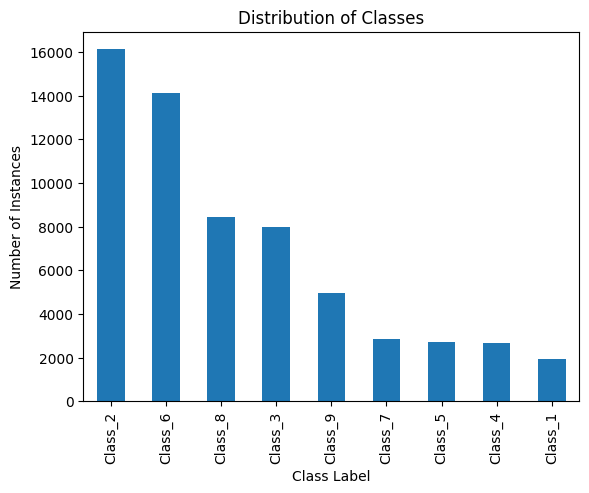

In [4]:
import matplotlib.pyplot as plt

data['target'].value_counts().plot(kind='bar')
plt.title('Distribution of Classes')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.show()

**Answer:**

As shown in the graph, it is evident that the dataset is imbalanced. Class_2 has the highest number of instances, with over 14,000. Other classes, such as Class_4 and Class_1, have significantly fewer instances, with each having less than 4,000. With a clear discrepancy between the number of instances for different classes, the performance of a classifier might be biased towards classes with more instances, such as Class_2, and may not perform as well on underrepresented classes.

## 1.2

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from time import time

# Splitting data
X = data.drop(columns=['target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classifiers
dt = DecisionTreeClassifier()
gb = GradientBoostingClassifier()

# Storing results
results = {
    'subset': [],
    'dt_accuracy': [],
    'gb_accuracy': [],
    'dt_time': [],
    'gb_time': []
}

for subset in range(10, 101, 10):
    if subset != 100:
        subset_size = int((subset/100) * len(X_train))
        X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, train_size=subset_size/len(X_train), random_state=42)
    else:
        X_train_sub, y_train_sub = X_train, y_train

    # Training Decision Tree
    start_time = time()
    dt.fit(X_train_sub, y_train_sub)
    dt_time = time() - start_time
    dt_accuracy = dt.score(X_test, y_test)

    # Training Gradient Boosting
    start_time = time()
    gb.fit(X_train_sub, y_train_sub)
    gb_time = time() - start_time
    gb_accuracy = gb.score(X_test, y_test)

    # Storing results
    results['subset'].append(subset)
    results['dt_accuracy'].append(dt_accuracy)
    results['gb_accuracy'].append(gb_accuracy)
    results['dt_time'].append(dt_time)
    results['gb_time'].append(gb_time)

# Convert results to a DataFrame for display
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results)


   subset  dt_accuracy  gb_accuracy   dt_time     gb_time
0      10     0.636635     0.760181  0.164383   18.486112
1      20     0.665158     0.771493  0.239868   36.954271
2      30     0.682207     0.777149  0.394830   52.757388
3      40     0.689560     0.780381  0.547866   71.853451
4      50     0.692873     0.782563  0.732910   97.408157
5      60     0.699418     0.782725  0.905771  107.918145
6      70     0.705721     0.780705  1.124602  125.303673
7      80     0.707175     0.784098  1.293925  148.300653
8      90     0.708468     0.784421  1.525673  168.028313
9     100     0.710326     0.784341  2.304773  189.021149


**Answer:**

## 1.3

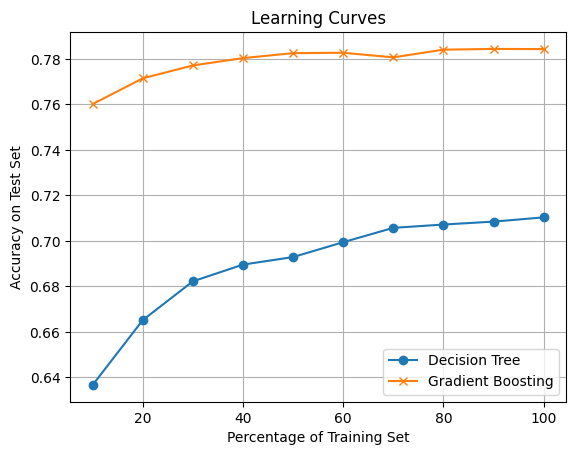

In [6]:
plt.plot(results['subset'], results['dt_accuracy'], marker='o', label='Decision Tree')
plt.plot(results['subset'], results['gb_accuracy'], marker='x', label='Gradient Boosting')
plt.xlabel('Percentage of Training Set')
plt.ylabel('Accuracy on Test Set')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

**Answer:**

## 1.4

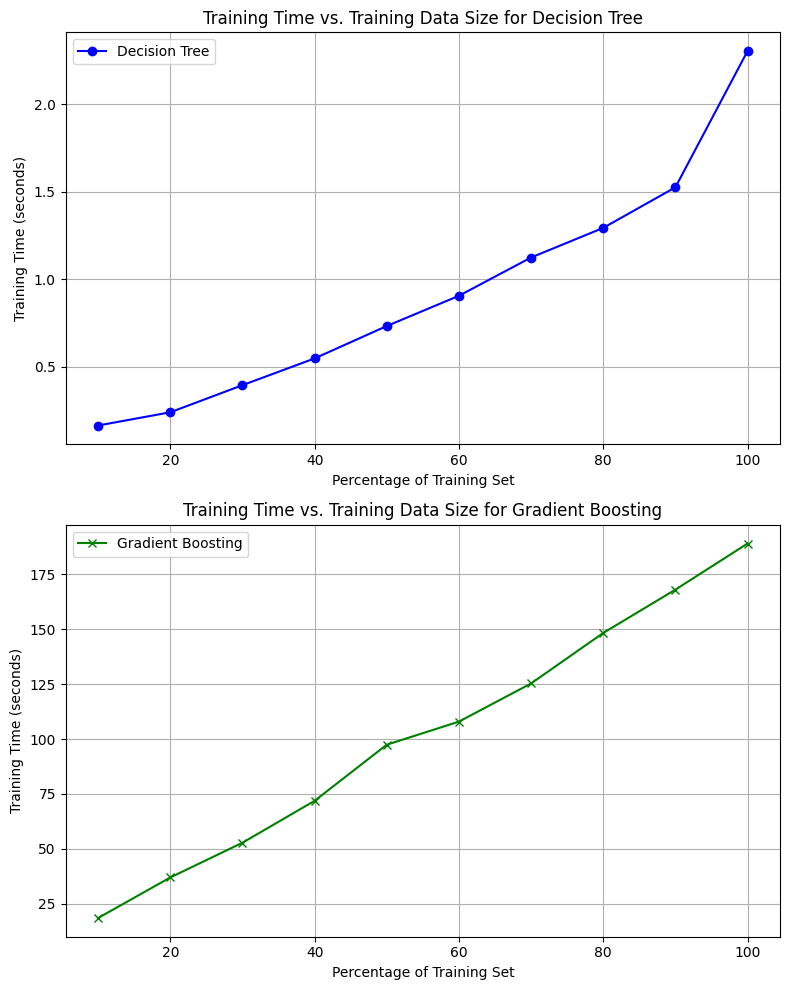

In [7]:
import matplotlib.pyplot as plt

# Creating a 2x1 grid for subplots (2 rows, 1 column)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plot for Decision Tree on the first subplot
axes[0].plot(results['subset'], results['dt_time'], marker='o', color='blue', label='Decision Tree')
axes[0].set_title('Training Time vs. Training Data Size for Decision Tree')
axes[0].set_xlabel('Percentage of Training Set')
axes[0].set_ylabel('Training Time (seconds)')
axes[0].grid(True)
axes[0].legend()

# Plot for Gradient Boosting on the second subplot
axes[1].plot(results['subset'], results['gb_time'], marker='x', color='green', label='Gradient Boosting')
axes[1].set_title('Training Time vs. Training Data Size for Gradient Boosting')
axes[1].set_xlabel('Percentage of Training Set')
axes[1].set_ylabel('Training Time (seconds)')
axes[1].grid(True)
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


**Answer:**

## 1.5

**Answer:**

**General Analysis Of The Graphs:**

1) Learning Curves (Accuracy vs. Percentage of Training Set):

- The accuracy of the Gradient Boosting classifier is consistently higher than that of the Decision Tree classifier across all subset sizes.
- The Decision Tree classifier's accuracy improves significantly as more data is used for training, especially between 10% to 60%. Beyond 60%, the improvement rate slows down, reaching a plateau towards 100%.
- The Gradient Boosting classifier's accuracy remains relatively stable and high across the different training sizes, indicating robustness to the amount of training data.

2) Training Time vs. Training Data Size:

- The training time for the Decision Tree classifier remains relatively constant across different training sizes. This suggests that, for this dataset, the complexity of the Decision Tree doesn't increase significantly with more data.
- The Gradient Boosting classifier's training time increases linearly with the size of the training data, indicating a direct proportionality between data size and training duration.
- Even for smaller training sizes, the Gradient Boosting classifier takes significantly more time to train than the Decision Tree classifier.

**Three Main Observations:**

1) Accuracy Performance: The Gradient Boosting classifier outperforms the Decision Tree classifier in terms of accuracy across all training subset sizes. This shows the superior generalization capability of Gradient Boosting.

2) Training Time: The Decision Tree classifier trains much faster than the Gradient Boosting classifier. The training time for Gradient Boosting increases with the amount of training data, while the Decision Tree's training time remains relatively stable.

3) Trade-off: There's a clear trade-off between accuracy and training time. While Gradient Boosting provides higher accuracy, it comes at the cost of longer training durations. The Decision Tree, on the other hand, offers faster training but at a slightly reduced accuracy.
Conclusions:

**Better Accuracy: Gradient Boosting provides better accuracy.**

**Shorter Training Time: The Decision Tree classifier has a shorter training time.**
